In [1]:
from IPython.display import display
import pandas as pd
import bnlearn
pd.set_option("display.max_columns", None)

## 4-4 数値解析（要因解析）

- 工場の生産ラインの不良品削減
- 小売店舗の売上向上
- 目的となる変数（KPI）を改善するための要因を見つける

### 4-4-1 業務課題の把握

工場の生産ラインの例

- 出荷前検査で製品の不良品が多いため、不良品数を削減したい
  - 製品の材料サイズや種類、各工程で使う生産設備のパラメータなどさまざまな条件がある
  - 何が不良品を減らすのに有効なのかわからない

小売業の例

- 売上を上げたい
  - どの商品をどの時間帯にアピールするか
  - 店員をどこに配置するのが効果があるか

### 4-4-2 分析方針の設計

- (b)機械学習を用いて進める
  - 「ベイジアンネットワーク」を用いる

&nbsp;

- ベイジアンネットワーク
  - 何らかの変数同士の関係を記述するための分析モデル
  - 予測とは異なり、不良品や売上といった変数の改善に有効な要因を見つけるための分析モデル
  - 変数のうちどちらが原因でどちらが結果なのかを推定したり
  - 変数に直接的に影響を及ぼすのか間接的に影響を及ぼすのかを推定したり
  - 構造学習と条件付き確率テーブルの推定
  - `bnlearn` パッケージ

### 4-4-3 データの理解・収集

- `bnlearn` パッケージ
  - 有限の種類の値を取るカテゴリカルデータである必要がある

### 4-4-4 bnlearn のインストール

### 4-4-4 データの加工

- (1)前処理・本処理・品質検査のデータを読み込み、pandas形式のデータフレームを作る
- (2)各データフレームの`id`カラムをキーにしてマージする
- (3)`id`は不良品率に関係ないので除く

In [2]:
# (1)前処理・本処理・品質検査のデータを読み込み、pandas形式のデータフレームを作る
data1 = pd.read_csv("../../support/src1300/src_ch04/4.4_要因解析/data/data4-4_first.csv")
data2 = pd.read_csv("../../support/src1300/src_ch04/4.4_要因解析/data/data4-4_second.csv")
data3 = pd.read_csv("../../support/src1300/src_ch04/4.4_要因解析/data/data4-4_third.csv")

# (2)各データフレームの`id`カラムをキーにしてマージする
data = data1.merge(data2, on="id").merge(data3, on="id")

# (3)`id`は不良品率に関係ないので除く
data = data.drop(columns=["id"])

### 4-4-6 データ分析・モデリング

In [3]:
# 構造学習

model = bnlearn.structure_learning.fit(
    data,
    methodtype="hc",
    scoretype="bic"
)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


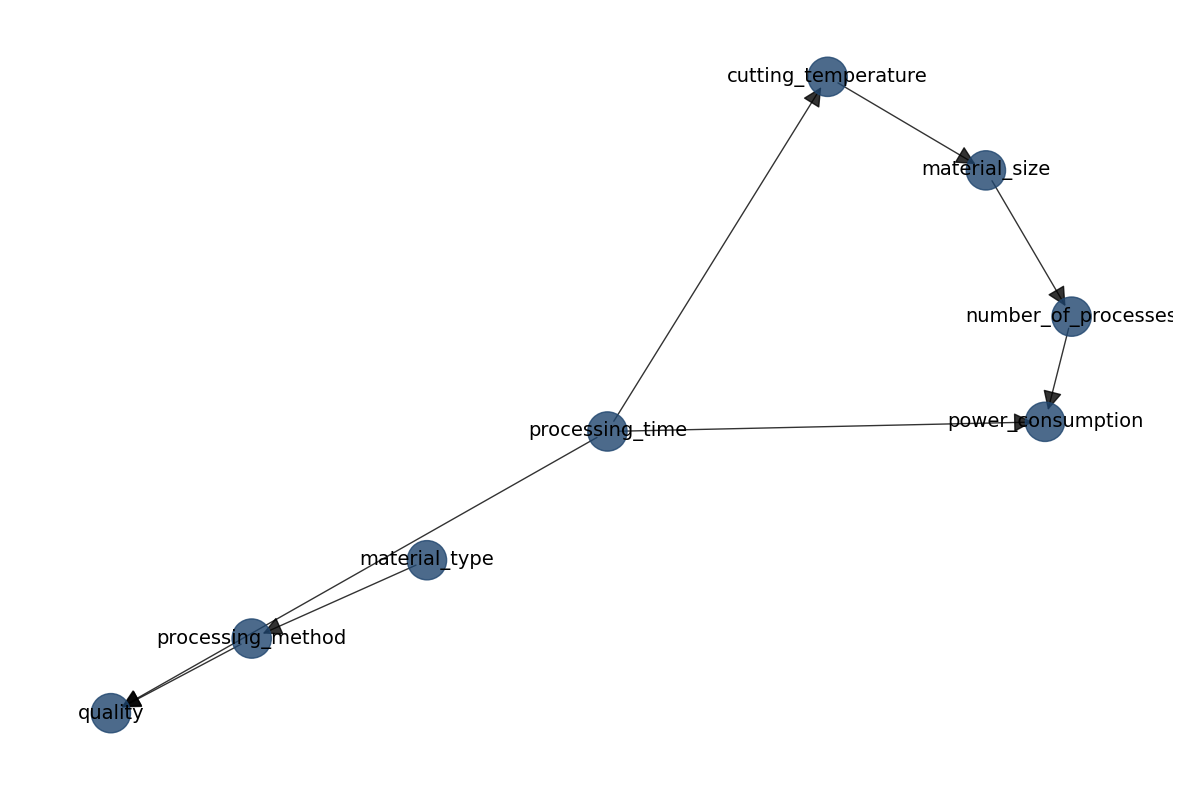

{'pos': {'material_size': array([0.5765871 , 0.47406474]),
  'material_type': array([-0.43048118, -0.27795879]),
  'number_of_processes': array([0.73103248, 0.19195336]),
  'processing_method': array([-0.74629792, -0.42904213]),
  'cutting_temperature': array([0.29141009, 0.6545455 ]),
  'processing_time': array([-0.10533539, -0.02960221]),
  'power_consumption': array([ 0.68308482, -0.01095875]),
  'quality': array([-1.        , -0.57300172])},
 'G': <networkx.classes.digraph.DiGraph at 0x110c4ee00>,
 'node_properties': {'material_size': {'node_color': '#1f456e',
   'node_size': 800},
  'material_type': {'node_color': '#1f456e', 'node_size': 800},
  'number_of_processes': {'node_color': '#1f456e', 'node_size': 800},
  'processing_method': {'node_color': '#1f456e', 'node_size': 800},
  'cutting_temperature': {'node_color': '#1f456e', 'node_size': 800},
  'processing_time': {'node_color': '#1f456e', 'node_size': 800},
  'power_consumption': {'node_color': '#1f456e', 'node_size': 800},
 

In [4]:
# 学習結果の可視化

bnlearn.plot(model)

In [7]:
# model["adjmat"] に隣接行列がpandasデータフレーム形式ではいっている
# 見やすいように「True/False」を「1/0」にする
# 縦軸の変数名から横軸の変数名に対して、エッジがる場合「1」、ない場合「0」

adjmat = model["adjmat"] * 1
display(adjmat)

target,material_size,material_type,number_of_processes,processing_method,cutting_temperature,processing_time,power_consumption,quality
source,,,,,,,,
material_size,0,0,1,0,0,0,0,0
material_type,0,0,0,1,0,0,0,0
number_of_processes,0,0,0,0,0,0,1,0
processing_method,0,0,0,0,0,0,0,1
cutting_temperature,1,0,0,0,0,0,0,0
processing_time,0,0,0,0,1,0,1,1
power_consumption,0,0,0,0,0,0,0,0
quality,0,0,0,0,0,0,0,0


#### 学習結果のばらつきの確認

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


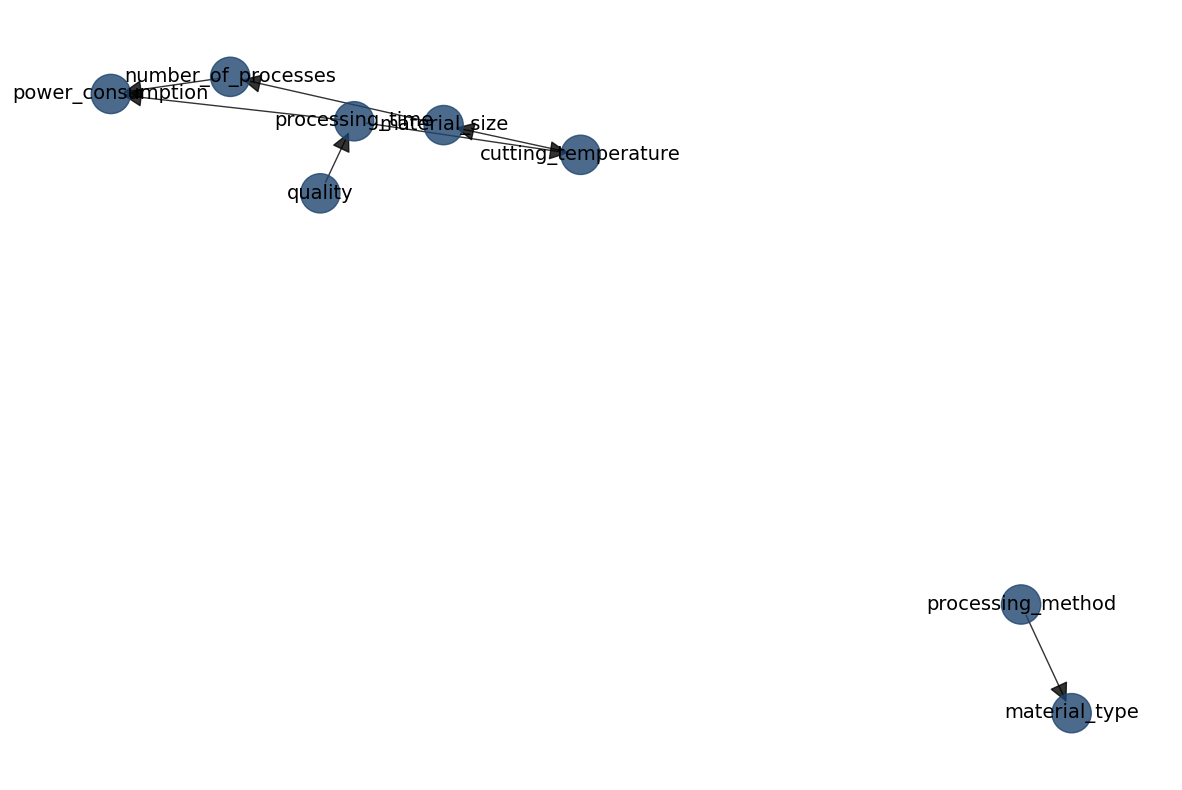

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


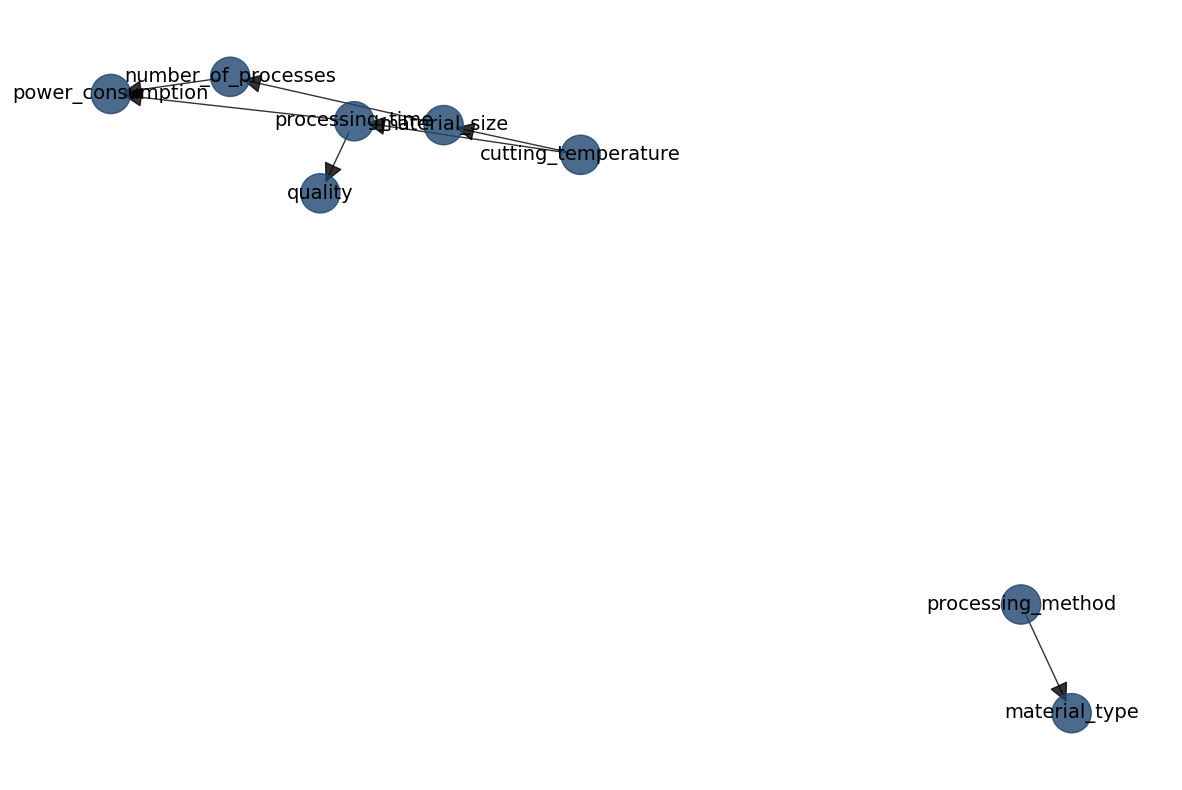

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


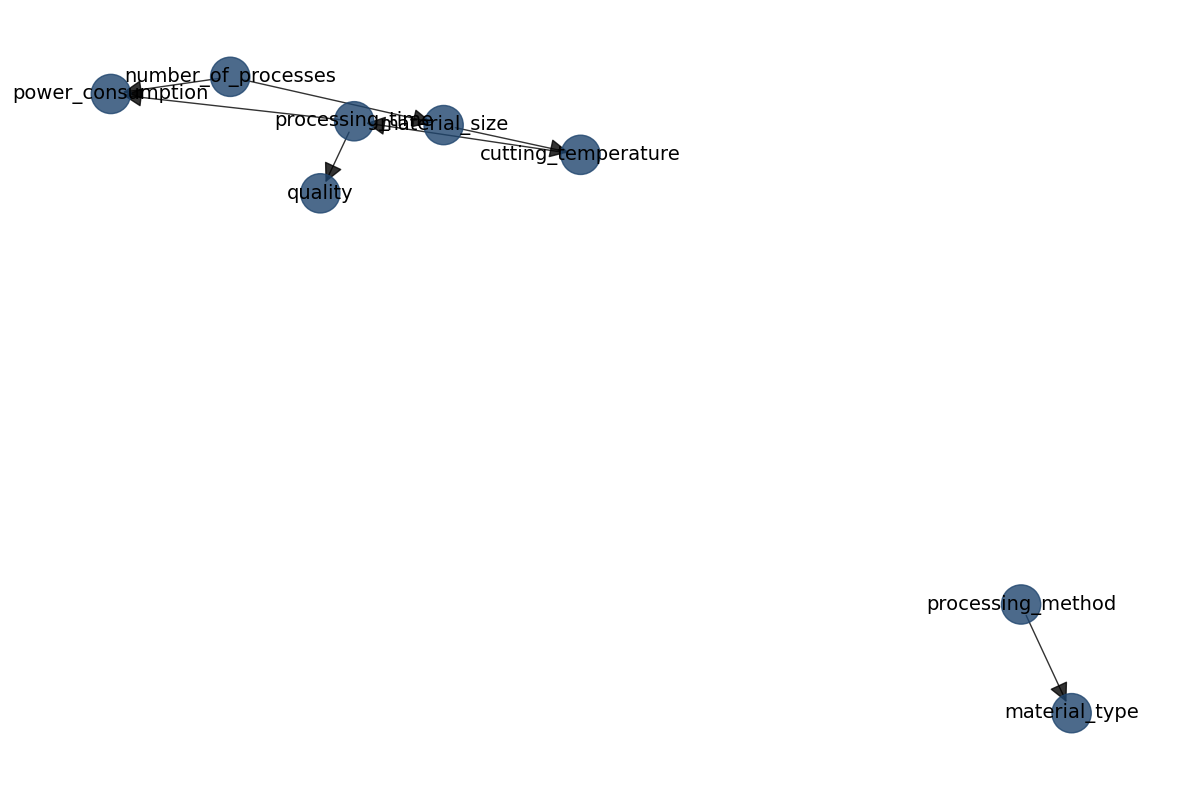

In [9]:
# 構造学習 1 回目
d = data.sample(frac=0.5)
model = bnlearn.structure_learning.fit(
    d, methodtype="hc", scoretype="bic"
)
G = bnlearn.plot(
    model,
    params_interactive={"figsize": (20, 10)}
)

# 構造学習 2 回目
d = data.sample(frac=0.5)
model = bnlearn.structure_learning.fit(
    d, methodtype="hc", scoretype="bic"
)
G = bnlearn.plot(
    model,
    params_interactive={"figsize": (20, 10)},
    pos=G["pos"]
)

# 構造学習 3 回目
d = data.sample(frac=0.5)
model = bnlearn.structure_learning.fit(
    d, methodtype="hc", scoretype="bic"
)
G = bnlearn.plot(
    model,
    params_interactive={"figsize": (20, 10)},
    pos=G["pos"]
)


#### ブートストラップによるベイジアンネットワークの作成

- ブートストラップ
  - データを何度もランダムに取り出して統計量を推定する手法の総称

In [18]:
# データの取り出し（復元抽出）と構造学習を100回繰り返し、
# 100回のうち50回以上現れたエッジのみ本当のエッジと判定する

# モデルの検証のためtest_dataを分けておく
train_data = data.sample(frac=0.9)
test_data = data.drop(train_data.index)

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bd

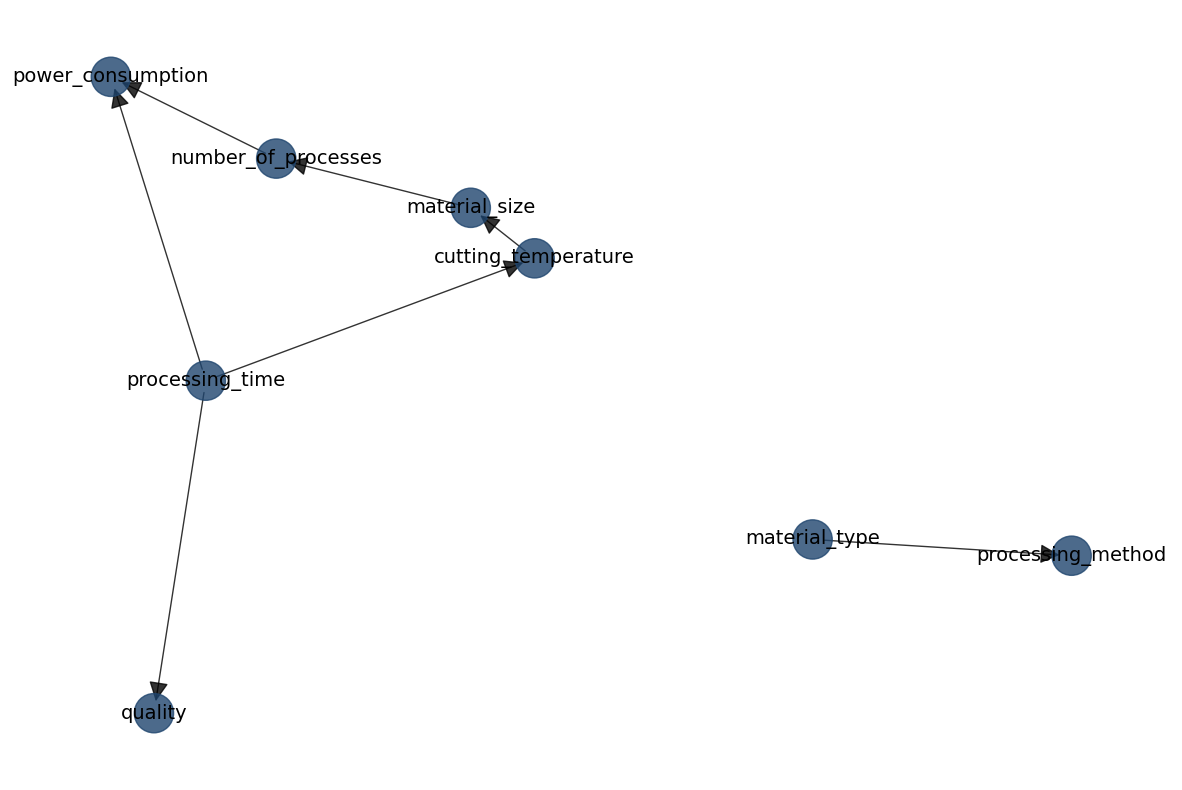

{'pos': {'material_size': array([0.01244605, 0.43633858]),
  'material_type': array([ 0.27494612, -0.50628966]),
  'number_of_processes': array([-0.13695134,  0.57614649]),
  'processing_method': array([ 0.47384696, -0.5524512 ]),
  'cutting_temperature': array([0.06148082, 0.29270959]),
  'processing_time': array([-0.19099601, -0.05500725]),
  'power_consumption': array([-0.26392009,  0.80855343]),
  'quality': array([-0.23085251, -1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x13bc7bc70>,
 'node_properties': {'material_size': {'node_color': '#1f456e',
   'node_size': 800},
  'material_type': {'node_color': '#1f456e', 'node_size': 800},
  'number_of_processes': {'node_color': '#1f456e', 'node_size': 800},
  'processing_method': {'node_color': '#1f456e', 'node_size': 800},
  'cutting_temperature': {'node_color': '#1f456e', 'node_size': 800},
  'processing_time': {'node_color': '#1f456e', 'node_size': 800},
  'power_consumption': {'node_color': '#1f456e', 'node_size': 800},

In [15]:
# ブートストラップを用いた構造学習
adjmat_list = []
for ignored in range(0, 100):
    d = train_data.sample(frac=0.5)
    est_model = bnlearn.structure_learning.fit(
        d, methodtype="hc", scoretype="bic", verbose=1
    )
    adjmat_list.append(est_model["adjmat"])

avg_adjmat = sum(adjmat_list)
adjmat = (avg_adjmat > (100 * 0.5)) * 1

# 隣接行列からbnlearn用のオブジェクトを作成
m = bnlearn.bnlearn.to_bayesiannetwork(adjmat)
boot_model = {"model": m, "adjmat": adjmat}

# 可視化
bnlearn.plot(boot_model, params_interactive={"figsize": (25, 10)})
# 1m

In [16]:
# 条件付き確率を推定する
# パラメータ学習
model = bnlearn.parameter_learning.fit(
    boot_model, train_data, methodtype="bayes", verbose=1
)

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [63]:
# ベイジアンネットワークが正しく学習できているか確認する
# qualityがokになる確率をベイジアンネットワークで計算して、
# AUC(Area Under the Curve) を求める

# モデルの検証用に分けておいたtest_dataでAUCを測定する
evidence = set(test_data.columns) - set(["quality"])
quality_probs = []

for row in test_data.iterrows():
    p = bnlearn.inference.fit(
        model, variables=["quality"],
        evidence=row[1][evidence].to_dict(),
        verbose=0
    )
    quality_probs.append(p.get_value(quality="ok"))

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(
    (test_data["quality"] == "ok").tolist(),
    quality_probs
)
print(auc)

0.7348939575830333


- AUCが小さく0.5に近い場合は、
  - プログラムやデータのバグで正しくモデルが学習できていない可能性がある

### 4.4.7 分析結果の考察

- 構造学習 `bnlearn.structure_learning.fit` の引数 `black_list` にエッジを指定する
  - 指定されたエッジを外して構造学習する

&nbsp;

- material_type（材料種類）とmaterial_size（材料サイズ）から
- processing_method（加工方法）などほかの変数を決めて生産している
- その逆はないので
  - material_type（材料種類）とmaterial_size（材料サイズ）に影響を及ぼすエッジを
  - すべてblack_listにしていする

In [64]:
# ブラックリストの作成
black_list = [
    ("cutting_temperature", "material_size"),
    ("number_of_processes", "material_size"),
    ("power_consumption",   "material_size"),
    ("processing_method",   "material_size"),
    ("processing_time",     "material_size"),
    ("quality",             "material_size"),
    ("cutting_temperature", "material_type"),
    ("number_of_processes", "material_type"),
    ("power_consumption",   "material_type"),
    ("processing_method",   "material_type"),
    ("processing_time",     "material_type"),
    ("quality",             "material_type"),
]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute structure scores ['k2', 'bd

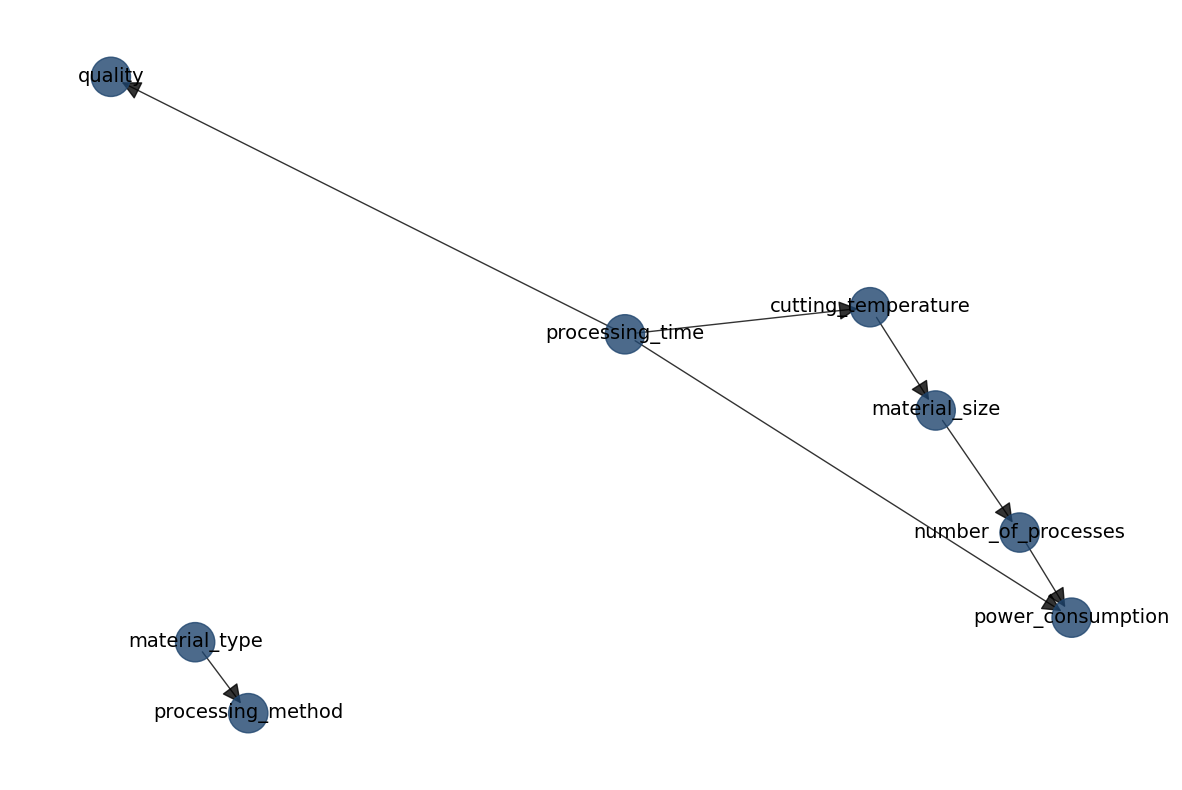

{'pos': {'material_size': array([0.53056784, 0.11606814]),
  'material_type': array([-0.7740854 , -0.49777012]),
  'number_of_processes': array([ 0.67844322, -0.20727499]),
  'processing_method': array([-0.6805096 , -0.68578377]),
  'cutting_temperature': array([0.41490724, 0.38962084]),
  'processing_time': array([-0.01685062,  0.31787313]),
  'power_consumption': array([ 0.77007882, -0.43273322]),
  'quality': array([-0.9225515,  1.       ])},
 'G': <networkx.classes.digraph.DiGraph at 0x13b9a1a20>,
 'node_properties': {'material_size': {'node_color': '#1f456e',
   'node_size': 800},
  'material_type': {'node_color': '#1f456e', 'node_size': 800},
  'number_of_processes': {'node_color': '#1f456e', 'node_size': 800},
  'processing_method': {'node_color': '#1f456e', 'node_size': 800},
  'cutting_temperature': {'node_color': '#1f456e', 'node_size': 800},
  'processing_time': {'node_color': '#1f456e', 'node_size': 800},
  'power_consumption': {'node_color': '#1f456e', 'node_size': 800},
 

In [66]:
# ブラックリストとブートストラップを用いた構造学習
adjmat_list = []
for ignored in range(0, 100):
    d = train_data.sample(frac=0.5)
    est_model = bnlearn.structure_learning.fit(
        d, methodtype="hc", scoretype="bic",
        black_list=black_list,
        bw_list_method="enforce",
        verbose=0
    )
    adjmat_list.append(est_model["adjmat"])

avg_adjmat = sum(adjmat_list)
adjmat = (avg_adjmat > (100 * 0.5)) * 1

m = bnlearn.bnlearn.to_bayesiannetwork(adjmat, verbose=0)
boot_model = {"model": m, "adjmat": adjmat}

# 学習結果の可視化
bnlearn.plot(boot_model, params_interactive={"figsize": (25, 10)})
# 60s

In [68]:
# 条件付き確率を推定する
# パラメータ学習
model = bnlearn.parameter_learning.fit(
    boot_model, train_data, methodtype="bayes", verbose=1
)

# モデルの検証用に分けておいたtest_dataでAUCを測定する
evidence = set(test_data.columns) - set(["quality"])
quality_probs = []

for row in test_data.iterrows():
    p = bnlearn.inference.fit(
        model, variables=["quality"],
        evidence=row[1][evidence].to_dict(),
        verbose=0
    )
    quality_probs.append(p.get_value(quality="ok"))

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(
    (test_data["quality"] == "ok").tolist(),
    quality_probs
)
print(auc)

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
0.7348939575830333


In [69]:
# 各変数がqualityに与える影響として条件付き確率を計算する
eff = pd.DataFrame()
for e in evidence:
    states = boot_model["model"].get_cpds(e).state_names[e]
    for s in states:
        p = bnlearn.inference.fit(
            boot_model, variables=["quality"],
            evidence = {e: s},
            verbose=0
        )
        eff = eff.append(
            pd.Series({
                "variable": e,
                "state": s,
                "ok": p.get_value(quality="ok"),
                "ng": p.get_value(quality="ng")
            }),
            ignore_index=True
        )
print(eff)

               variable    state        ok        ng
0   number_of_processes       10  0.482081  0.517919
1   number_of_processes       20  0.483024  0.516976
2         material_size    large  0.486538  0.513462
3         material_size   medium  0.482054  0.517946
4         material_size    small  0.477374  0.522626
5         material_type    brass  0.482632  0.517368
6         material_type   copper  0.482632  0.517368
7         material_type    steel  0.482632  0.517368
8     processing_method  method1  0.482632  0.517368
9     processing_method  method2  0.482632  0.517368
10  cutting_temperature     high  0.492019  0.507981
11  cutting_temperature      low  0.472544  0.527456
12  cutting_temperature   middle  0.474861  0.525139
13    power_consumption     high  0.471999  0.528001
14    power_consumption      low  0.487784  0.512216
15    power_consumption   middle  0.485956  0.514044
16      processing_time     long  0.358702  0.641298
17      processing_time   middle  0.603186  0.